In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
import numpy as np
import os
import cv2

Using TensorFlow backend.


In [0]:
path = os.getcwd()
data = path + '/drive/My Drive/Malaria predicition/'
data_dir_list = os.listdir(data)
data_dir_list

['Parasitized', 'Uninfected']

In [0]:
img_rows=128
img_cols=128
num_channel=1
num_epoch=20

num_classes = 2
image_data_list = []

In [0]:
labels_name = {'Parasitized':1, 'Uninfected':0}

In [0]:
data

'/content/drive/My Drive/Malaria predicition/'

In [0]:
data_dir_list

['Parasitized', 'Uninfected']

In [0]:
data_dir_list[0]

'Parasitized'

In [0]:
img_data_list=[]
labels_list = []

for dataset in data_dir_list:
    
  img_list = os.listdir(data+'/'+ dataset)
  print ('Loading the images of dataset-'+'{}\n'.format(dataset))
  label = labels_name[dataset]
  
  for img in img_list[:5000]:
                
    image = cv2.imread(data + '/' + dataset + '/' + img )
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_resize = cv2.resize(image, (img_rows, img_cols))
    img_data_list.append(image_resize.flatten())

    labels_list.append(label)    

Loading the images of dataset-Parasitized

Loading the images of dataset-Uninfected



In [0]:
img_data = np.array(img_data_list)

In [0]:
img_data = img_data/255
img_data=img_data.astype('float32')

In [0]:
len(labels_list)

10000

In [0]:
img_data.shape

(10000, 16384)

In [0]:
labels = np.array(labels_list)
# Y = np_utils.to_categorical(labels, num_classes)

In [0]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [0]:
x,y = shuffle(img_data,labels, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 16384)
(3000, 16384)
(7000,)
(3000,)


In [0]:
import matplotlib.pyplot as plt
from keras import backend as K
from keras.layers import Conv2D
import keras

In [0]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

In [0]:
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.2, random_state= 42)

In [0]:
print('shape of train data', X_train.shape)
print('shape of cv data', X_cv.shape)
print('shape of test data', X_test.shape)

shape of train data (5600, 128, 128, 1)
shape of cv data (1400, 128, 128, 1)
shape of test data (3000, 128, 128, 1)


In [0]:
print('shape of train label', y_train.shape)
print('shape of cv label', y_cv.shape)
print('shape of test label', y_test.shape)

shape of train label (5600,)
shape of cv label (1400,)
shape of test label (3000,)


In [0]:
# if num_channel==1:
# 	if K.image_dim_ordering()=='th':
# 		img_data= np.expand_dims(img_data, axis=1) 
# 		print (img_data.shape)
# 	else:
# 		img_data= np.expand_dims(img_data, axis=4) 
# 		print (img_data.shape)
		
# else:
# 	if K.image_dim_ordering()=='th':
# 		img_data=np.rollaxis(img_data,3,1)
# 		print (img_data.shape)

**Modelling**

In [0]:
X_train.shape

(5600, 128, 128, 1)

In [0]:
y_train.shape

(5600,)

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same' ,activation='relu', input_shape = (img_rows, img_cols, 1)))
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='valid' ,activation='relu'))
model.add(Conv2D(128, strides=(2,2), kernel_size=(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 128, 128, 32)      320       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 126, 126, 64)      18496     
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 63, 63, 128)       32896     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 31, 31, 128)       0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 31, 31, 128)       0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 123008)            0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               15745152  
__________

In [0]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy',])

In [0]:
model.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_cv, y_cv))

Train on 5600 samples, validate on 1400 samples
Epoch 1/20
5600/5600 [==============================] - 12s 2ms/step - loss: 0.6979 - acc: 0.5202 - val_loss: 0.6732 - val_acc: 0.5979
Epoch 2/20
5600/5600 [==============================] - 11s 2ms/step - loss: 0.6700 - acc: 0.5904 - val_loss: 0.6403 - val_acc: 0.6336
Epoch 3/20
5600/5600 [==============================] - 11s 2ms/step - loss: 0.6299 - acc: 0.6484 - val_loss: 0.5845 - val_acc: 0.6871
Epoch 4/20
5600/5600 [==============================] - 11s 2ms/step - loss: 0.5522 - acc: 0.7246 - val_loss: 0.6282 - val_acc: 0.6493
Epoch 5/20
5600/5600 [==============================] - 10s 2ms/step - loss: 0.4013 - acc: 0.8363 - val_loss: 0.3578 - val_acc: 0.8571
Epoch 6/20
5600/5600 [==============================] - 10s 2ms/step - loss: 0.2290 - acc: 0.9257 - val_loss: 0.2638 - val_acc: 0.9293
Epoch 7/20
5600/5600 [==============================] - 10s 2ms/step - loss: 0.1515 - acc: 0.9573 - val_loss: 0.3082 - val_acc: 0.8964
Epoch 8

In [0]:
from keras.utils import plot_model
import matplotlib.pyplot as plt

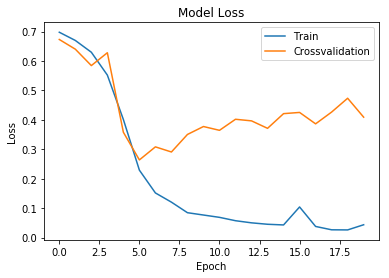

In [0]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Crossvalidation'], loc='upper right')
plt.show()

**Predicting**

In [0]:
X_train[0].shape

(128, 128, 1)

In [0]:
def resize(image):
  image = image.reshape(128,128,1)
  return image

def predict(image):
  return (model.predict_classes(image))

In [0]:
score = model.evaluate(X_test, y_test,verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.5035891513622677
Test accuracy: 0.9130000001589457


In [0]:
test_image = X_test[150:151]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[150:151])

(1, 128, 128, 1)
[[1.4439354e-19 1.0000000e+00]]
[1]
[1]


**Testing our model**

In [0]:
print(model.predict_classes(X_test[10:15]))
print(y_test[10:15])

[0 0 0 0 1]
[0 0 0 0 1]


**save the model**

In [0]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")